# Airbnb Price Prediction System :
We’re developing a price prediction model designed to help Airbnb hosts set competitive prices for their listings based on key features. By predicting optimal pricing, our tool empowers hosts to attract customers more effectively, while enabling users to quickly discover the best options for their needs and budget. This solution bridges hosts and customers, aligning interests for seamless and rewarding booking experiences.








#### Installing Libraries

In [ ]:
!pip install geopy
!pip install reverse_geocoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268068 sha256=e2793ba8205f6b29177e75cf73c86ea68e08bd17f64dd0df30c1d3b6081e4465
  Stored in directory: /root/.cache/pip/wheels/bd/e5/88/eb139b6d6a26b8022d370ab991f7a836802fed9871975ec6d9
Successfully built reverse_geocoder


#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from collections import Counter
import ast

# Data Collection :
Our data is sourced from publicly available information on InsideAirbnb.com, focusing specifically on Airbnb listings in Boston, Massachusetts. We’ll exclusively use listing data in CSV format, ensuring no personal or sensitive information is stored. This data-driven approach allows us to maintain privacy while enhancing our price prediction model for hosts.

Varaibles we are including :      

#### host_response_time
#### host_response_rate
#### host_acceptance_rate
#### host_is_superhost
#### host_neighbourhood
#### host_identity_verified
#### latitude
#### longitude
#### property_type
#### room_type
#### accommodates
#### bathrooms
#### bedrooms
#### beds
#### minimum_nights
#### maximum_nights
#### number_of_reviews_ltm
#### number_of_reviews_l30d
#### review_scores_rating
#### review_scores_accuracy
#### review_scores_cleanliness
#### review_scores_checkin
#### review_scores_communication
#### review_scores_location
#### review_scores_value
#### license
#### instant_bookable
#### price


#### Reading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
file_path = '/content/drive/MyDrive/IntroductionToDS_groupProject/data/Airbnb_Data.csv'
dataframe = pd.read_csv(file_path)
dataframe.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781.0,https://www.airbnb.com/rooms/3781,20240622024514,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.84,4.88,NaN,f,1,1,0,0,0.23


In [ ]:
'''
We are only choosing data of Boston, MA is simply Boston, Massachusetts.Beacuse our analysis
is depends on this city to find the airbnb price.
'''
dataframe = dataframe[dataframe['host_location'] == 'Boston, MA']

In [ ]:
# Checking the Number of Rows and Columns in the dataset.
print("The Number of Rows in the dataset are",{dataframe.shape[0]})
print("The Number of Columns in the dataset are",{dataframe.shape[1]})

The Number of Rows in the dataset are {2408}
The Number of Columns in the dataset are {75}


In [ ]:
# Reading Variables
dataframe=dataframe[[
    "host_response_time",
    "host_response_rate",
    "host_acceptance_rate",
    "host_is_superhost",
    "host_neighbourhood",
    "host_identity_verified",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "minimum_nights",
    "maximum_nights",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "license",
    "instant_bookable",
    "amenities",
    "price"
]]

In [ ]:
# Renaming Columns
new_column_names = {
    'host_response_time': 'Host_response_time',
    'host_response_rate': 'Host_response_rate',
    'host_acceptance_rate': 'Host_acceptance_rate',
    'host_is_superhost': 'Host_is_superhost',
    'host_neighbourhood': 'Host_neighbourhood',
    'host_identity_verified': 'Host_identity_verified',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'property_type': 'Property_type',
    'room_type': 'Room_type',
    'accommodates': 'Accommodates',
    'bathrooms': 'Bathrooms',
    'bedrooms': 'Bedrooms',
    'beds': 'Beds',
    'minimum_nights': 'Minimum_nights',
    'maximum_nights': 'Maximum_nights',
    'number_of_reviews_ltm': 'Number_of_reviews_ltm',
    'number_of_reviews_l30d': 'Number_of_reviews_l30d',
    'review_scores_rating': 'Review_scores_rating',
    'review_scores_accuracy': 'Review_scores_accuracy',
    'review_scores_cleanliness': 'Review_scores_cleanliness',
    'review_scores_checkin': 'Review_scores_checkin',
    'review_scores_communication': 'Review_scores_communication',
    'review_scores_location': 'Review_scores_location',
    'review_scores_value': 'Review_scores_value',
    'license': 'License',
    'instant_bookable': 'Instant_bookable',
    'amenities': 'Amenities',
    'price': 'Price'
}

# Renaming columns in the DataFrame
dataframe.rename(columns=new_column_names, inplace=True)

In [ ]:
null_percentage = dataframe.isnull().mean() * 100
print(null_percentage)

Host_response_time             13.496678
Host_response_rate             13.496678
Host_acceptance_rate           12.624585
Host_is_superhost               2.657807
Host_neighbourhood              3.156146
Host_identity_verified          0.000000
Latitude                        0.000000
Longitude                       0.000000
Property_type                   0.000000
Room_type                       0.000000
Accommodates                    0.000000
Bathrooms                      18.313953
Bedrooms                        4.775748
Beds                           18.521595
Minimum_nights                  0.000000
Maximum_nights                  0.000000
Number_of_reviews_ltm           0.000000
Number_of_reviews_l30d          0.000000
Review_scores_rating           11.669435
Review_scores_accuracy         11.752492
Review_scores_cleanliness      11.752492
Review_scores_checkin          11.794020
Review_scores_communication    11.752492
Review_scores_location         11.794020
Review_scores_va

In [ ]:
# Unique values of each column
unique_values_of_each_column = dataframe.apply(lambda x: x.unique())
for i in range(0,len(unique_values_of_each_column)):
  print(unique_values_of_each_column[i])

['within an hour' 'within a day' nan 'within a few hours'
 'a few days or more']
['100%' '72%' nan '0%' '63%' '71%' '80%' '97%' '99%' '98%' '67%' '90%'
 '88%' '50%' '75%' '30%' '96%' '65%' '84%' '95%' '33%' '53%' '86%' '94%'
 '91%' '93%' '92%' '83%' '10%' '25%' '70%' '60%' '74%' '9%']
['99%' '46%' '93%' '100%' '78%' '89%' '75%' '53%' '81%' '90%' '96%' '66%'
 nan '95%' '0%' '91%' '98%' '97%' '77%' '69%' '67%' '86%' '82%' '71%'
 '45%' '76%' '85%' '28%' '88%' '94%' '92%' '62%' '87%' '84%' '50%' '70%'
 '39%' '83%' '43%' '42%' '33%' '47%' '14%' '40%' '80%' '44%' '59%' '17%'
 '25%' '61%' '52%' '72%' '74%' '68%' '60%' '31%' '63%' '51%' '9%' '15%'
 '29%' '24%' '79%' '19%' '56%' '65%']
['t' 'f' nan]
['Roxbury' 'Beacon Hill' 'Dorchester' 'Charlestown' 'Jamaica Plain'
 'North End' 'South Boston' 'Back Bay' 'Roslindale' 'Downtown Crossing'
 'South End' 'Government Center' 'West End' nan 'Allston-Brighton'
 'Fenway/Kenmore' 'Hyde Park' 'West Roxbury' 'East Boston' 'Mattapan'
 'Leather District' 'Mi

<ipython-input-12-b1071d59b41a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(unique_values_of_each_column[i])


In [ ]:
'''dataframe['Room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}, inplace=True)
dataframe['Property_type'].replace({'Entire guest suite': 0, 'Entire condo': 1, 'Entire rental unit': 2, 'Private room in home': 3, 'Private room in rental unit': 4, 'Private room in townhouse': 5, 'Private room in condo': 6, 'Entire home': 7, 'Entire townhouse': 8, 'Entire loft': 9, 'Private room in bed and breakfast': 10, 'Shared room in home': 11, 'Entire guesthouse': 12, 'Entire serviced apartment': 13, 'Private room in guest suite': 14, 'Private room': 15, 'Private room in bungalow': 16, 'Private room in loft': 17, 'Entire place': 18, 'Private room in guesthouse': 19, 'Room in boutique hotel': 20, 'Shared room in townhouse': 21, 'Private room in serviced apartment': 22, 'Shared room in boutique hotel': 23, 'Private room in casa particular': 24, 'Boat': 25, 'Shared room in condo': 26, 'Private room in vacation home': 27, 'Shared room in vacation home': 28, 'Room in aparthotel': 29, 'Entire vacation home': 30, 'Shared room in rental unit': 31, 'Private room in villa': 32}, inplace=True)
dataframe['Host_neighborhood'].replace({'Roxbury': 0, 'Beacon Hill': 1, 'Dorchester': 2, 'Charlestown': 3, 'Jamaica Plain': 4, 'North End': 5, 'South Boston': 6, 'Back Bay': 7, 'Roslindale': 8, 'Downtown Crossing': 9, 'South End': 10, 'Government Center': 11, 'West End': 12, np.nan: -1, 'Allston-Brighton': 13, 'Fenway/Kenmore': 14, 'Hyde Park': 15, 'West Roxbury': 16, 'East Boston': 17, 'Mattapan': 18, 'Leather District': 19, 'Mission Hill': 20, 'Chinatown': 21, 'Theater District': 22, 'Cape Neddick': 23, 'Cambridge': 24, 'Downtown': 25, 'Chestnut Hill': 26, 'Back Bay West': 27, 'Brighton': 28, 'Harwich Port': 29, 'Spring Hill': 30, 'Brookline': 31, 'East Downtown': 32, 'Lower Allston': 33, 'Prudential / St. Botolph': 34, 'D Street / West Broadway': 35, 'Bay Village': 36, 'Boston Theater District': 37, 'Eagle Hill': 38, 'Jeffries Point': 39, 'Fenway–Kenmore': 40, 'Allston': 41, 'Stony Brook / Cleary Square': 42, 'Columbus Park / Andrew Square': 43, 'Codman Square': 44, 'Central City': 45, "St. Elizabeth's": 46, 'Harvard Square': 47, 'Franklin Field South': 48, 'Brewster': 49, 'City Point': 50, 'Cedar Grove': 51, 'West Fens': 52, 'Fisher Hill': 53, 'Rockport': 54, 'East Falmouth': 55, 'Orient Heights': 56, 'Franklin Field North': 57, 'Ward Two': 58, 'Southern Mattapan': 59, 'Metropolitan Hill / Beech Street': 60, 'Harbor View / Orient Heights': 61, 'Sun Bay South': 62, 'Newton': 63, 'Wellington Hill': 64, 'Brook Farm': 65, 'South Sanford': 66, 'Dorchester Center': 67, 'Commonwealth': 68, 'Medford Street / The Neck': 69, 'West Street / River Street': 70, 'Lower Washington / Mount Hope': 71, 'South Medford': 72, 'Vineyard Haven': 73, 'Fairmount Hill': 74, 'South Beach': 75, 'Uplands': 76}, inplace=True)
dataframe['Host_response_time'].replace({'Fast': 0, 'Moderate': 1, 'Slow': 2}, inplace=True)'''



# Data Preperation and EDA :     

In [ ]:
# Filling Missing Values in the dataset.
for column in dataframe.columns:
  if column=='License' :
    continue
  else:
    if dataframe[column].dtype in [np.float64, np.int64]:  # Check if the column is numerical
        median_value = dataframe[column].median()  # Calculate median
        dataframe[column].fillna(median_value, inplace=True)  # Fill NaN with median
    else:  # If it's categorical
        mode_value = dataframe[column].mode()[0]  # Calculate mode
        dataframe[column].fillna(mode_value, inplace=True)  # Fill NaN with mode

<ipython-input-13-d9567326f69b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(mode_value, inplace=True)  # Fill NaN with mode
<ipython-input-13-d9567326f69b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
# Extract the features
city_center_coords = (42.3601, -71.0589)  # These are Bosten City Center Coordinates.
dataframe['Distance_from_city_center_km'] = dataframe.apply(
    lambda row: geodesic(
        (row['Latitude'], row['Longitude']), city_center_coords).km, axis=1
    )

# Check Person having license or not
dataframe['Having_License'] = dataframe['License'].notnull()
dataframe['Having_License'] = dataframe['Having_License'].replace(
    {True: True, False: False}
  )

# neighborhood_with_coords
dataframe['Neighborhood_with_coords'] = dataframe.apply(
    lambda row: {
        'name': row['Host_neighbourhood'],
        'latitude': row['Latitude'],
        'longitude': row['Longitude']
    }, axis=1)

neighborhood_coords = {
    row['Host_neighbourhood']: {
        'latitude': row['Latitude'],
        'longitude': row['Longitude']
    } for index, row in dataframe.iterrows()
}

In [ ]:
neighborhood_coords

{'Roxbury': {'latitude': 42.32642574, 'longitude': -71.09581055},
 'Beacon Hill': {'latitude': 42.3603, 'longitude': -71.06588},
 'Dorchester': {'latitude': 42.31656979, 'longitude': -71.05215552},
 'Charlestown': {'latitude': 42.37321342, 'longitude': -71.06162061},
 'Jamaica Plain': {'latitude': 42.31672295, 'longitude': -71.11642095},
 'North End': {'latitude': 42.34399646, 'longitude': -71.06372085},
 'South Boston': {'latitude': 42.33483, 'longitude': -71.03652},
 'Back Bay': {'latitude': 42.33511, 'longitude': -71.07756},
 'Roslindale': {'latitude': 42.28117408, 'longitude': -71.1538144},
 'Downtown Crossing': {'latitude': 42.3544, 'longitude': -71.06039},
 'South End': {'latitude': 42.34583822, 'longitude': -71.06497243},
 'Government Center': {'latitude': 42.3597641, 'longitude': -71.06116486},
 'West End': {'latitude': 42.36548, 'longitude': -71.06833},
 'Allston-Brighton': {'latitude': 42.3496, 'longitude': -71.07185},
 'Fenway/Kenmore': {'latitude': 42.34742, 'longitude': -7

In [ ]:
dataframe['Neighborhood_with_coords']

,Neighborhood_with_coords
1,"{'name': 'Roxbury', 'latitude': 42.32844, 'lon..."
2,"{'name': 'Roxbury', 'latitude': 42.32802, 'lon..."
3,"{'name': 'Beacon Hill', 'latitude': 42.35867, ..."
7,"{'name': 'Dorchester', 'latitude': 42.32212, '..."
8,"{'name': 'Charlestown', 'latitude': 42.37754, ..."
...,...
4319,"{'name': 'Brewster', 'latitude': 42.33797, 'lo..."
4320,"{'name': 'Brewster', 'latitude': 42.339042, 'l..."
4321,"{'name': 'Brewster', 'latitude': 42.339042, 'l..."
4322,"{'name': 'Brewster', 'latitude': 42.339042, 'l..."


In [ ]:
# Mapping Values In the Standard Format
response_time_mapping = {
    'within an hour': 'Fast',
    'within a few hours': 'Fast',
    'within a day': 'Moderate',
    'a few days or more': 'Slow',
}
dataframe['Host_response_time'] = dataframe['Host_response_time'].map(response_time_mapping)


def convert_percentage_to_decimal(rate):
    if rate == 'N/A' or pd.isna(rate):
        return np.nan
    else:
        return float(rate.strip('%')) / 100

dataframe['Host_response_rate'] = dataframe['Host_response_rate'].apply(convert_percentage_to_decimal)
dataframe['Host_acceptance_rate'] = dataframe['Host_acceptance_rate'].apply(convert_percentage_to_decimal)


def convert_superhost(value):
    return True if value == 't' else False if value == 'f' else np.nan

dataframe['Host_is_superhost'] = dataframe['Host_is_superhost'].apply(convert_superhost)
dataframe['Host_identity_verified'] = dataframe['Host_identity_verified'].apply(convert_superhost)
dataframe['Instant_bookable'] = dataframe['Instant_bookable'].apply(convert_superhost)

# Get the Price Feature from the data
dataframe['Price'] = dataframe['Price'].replace('[\$,]', '', regex=True).astype(float)

# Round all float columns to 2 decimal places, and Price column to 1 decimal place
dataframe = dataframe.round({col: 2 for col in dataframe.select_dtypes(include='float').columns})




In [ ]:
dataframe.head(2)

,Host_response_time,Host_response_rate,Host_acceptance_rate,Host_is_superhost,Host_neighbourhood,Host_identity_verified,Latitude,Longitude,Property_type,Room_type,...,Review_scores_communication,Review_scores_location,Review_scores_value,License,Instant_bookable,Amenities,Price,Distance_from_city_center_km,Having_License,Neighborhood_with_coords
1,Fast,1.0,0.99,True,Roxbury,True,42.33,-71.10,Entire guest suite,Entire home/apt,...,4.89,4.56,4.75,STR-490093,False,"[""Fire extinguisher"", ""Free street parking"", ""...",139.0,4.65,True,"{'name': 'Roxbury', 'latitude': 42.32844, 'lon..."
2,Fast,1.0,0.99,True,Roxbury,True,42.33,-71.09,Entire condo,Entire home/apt,...,4.95,4.52,4.72,STR-491702,False,"[""Fire extinguisher"", ""Free street parking"", ""...",179.0,4.58,True,"{'name': 'Roxbury', 'latitude': 42.32802, 'lon..."


#### There is Some correlation in the data in the correlation matrix so we can take all into account and make our machine learning algorithm

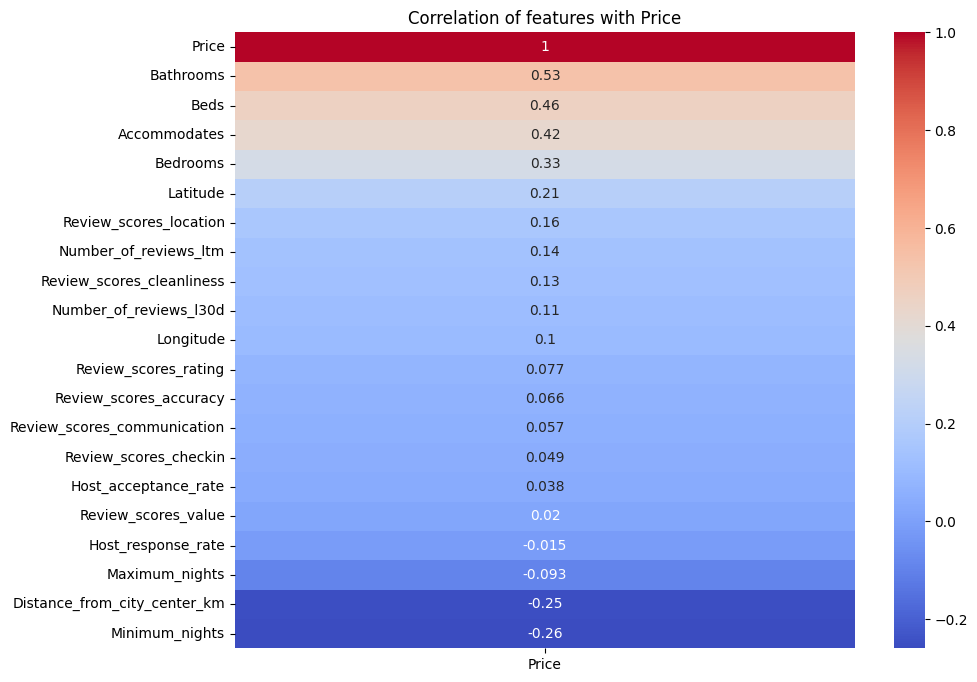

Highly correlated features with Price: ['Bathrooms', 'Price']


In [ ]:
# Feature Selection for Numerical Features Only
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from the dataframe
numerical_dataframe = dataframe.select_dtypes(include=['float', 'int'])

# Calculate correlation matrix
correlation_matrix = numerical_dataframe.corr()

# Plot the correlation heatmap for 'Price' with other numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of features with Price")
plt.show()

# Select features with a high correlation with 'Price' (e.g., above 0.5)
correlated_features = correlation_matrix['Price'][correlation_matrix['Price'].abs() > 0.5].index.tolist()
print("Highly correlated features with Price:", correlated_features)



#### Top 2 Categorical Features are Top categorical features: ['Host_neighbourhood', 'Property_type']


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
dataframe1=dataframe[['Host_response_time','Host_neighbourhood','Property_type','Room_type','Price']]
# Automatically get categorical features from the DataFrame
categorical_features = dataframe1.select_dtypes(include=['object', 'category']).columns.tolist()
# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_features:
    dataframe1[col] = label_encoder.fit_transform(dataframe1[col])

# Prepare data for chi-squared selection
X_cat = dataframe1[categorical_features]
y = dataframe1['Price']

# Apply Chi-squared feature selection
chi2_selector = SelectKBest(score_func=chi2, k=2)  # Select top 5 features
X_kbest = chi2_selector.fit_transform(X_cat, y)

# Get selected features
selected_features = [categorical_features[i] for i in chi2_selector.get_support(indices=True)]
print("Top categorical features:", selected_features)

Top categorical features: ['Host_neighbourhood', 'Property_type']


<ipython-input-20-63dda1494816>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe1[col] = label_encoder.fit_transform(dataframe1[col])
<ipython-input-20-63dda1494816>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe1[col] = label_encoder.fit_transform(dataframe1[col])
<ipython-input-20-63dda1494816>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

#### Box Plot

<Figure size 1500x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

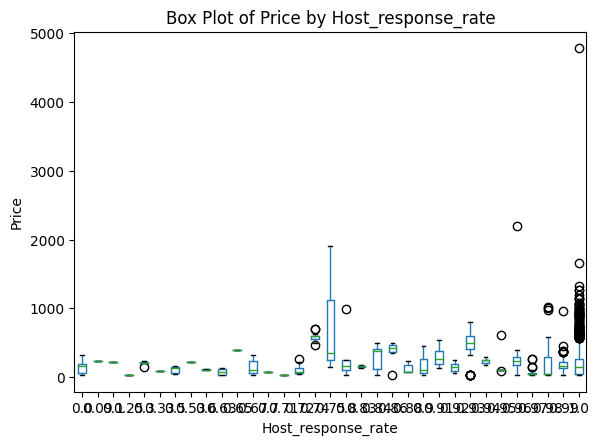

<Figure size 640x480 with 0 Axes>

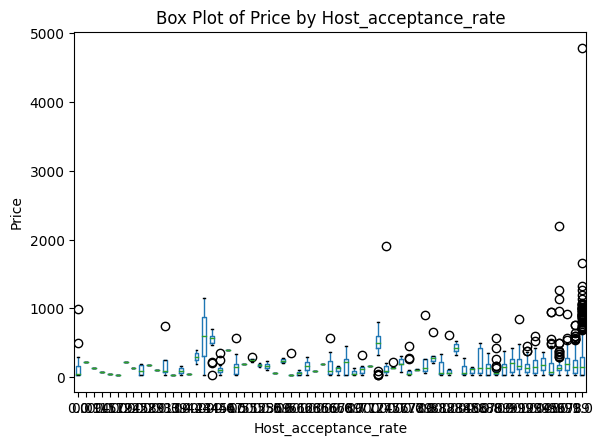

<Figure size 640x480 with 0 Axes>

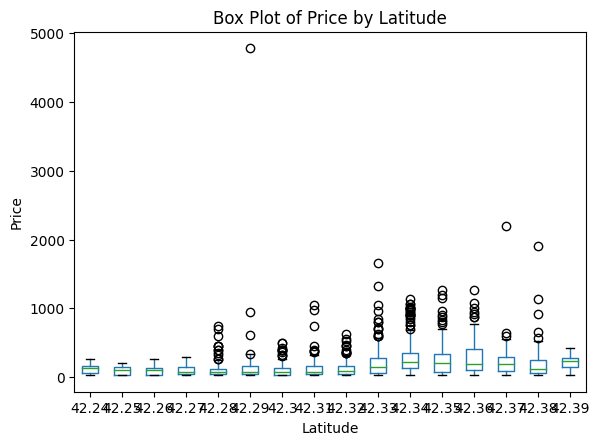

<Figure size 640x480 with 0 Axes>

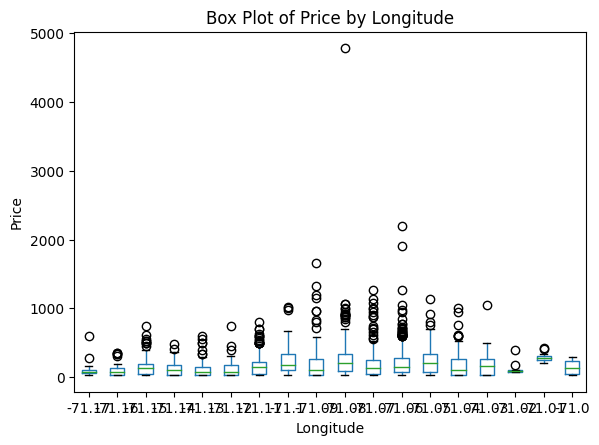

<Figure size 640x480 with 0 Axes>

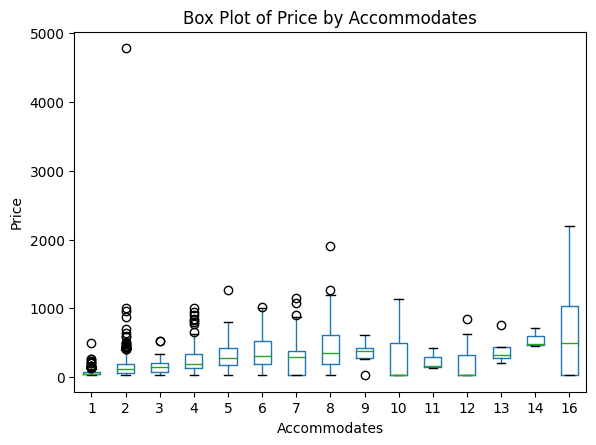

<Figure size 640x480 with 0 Axes>

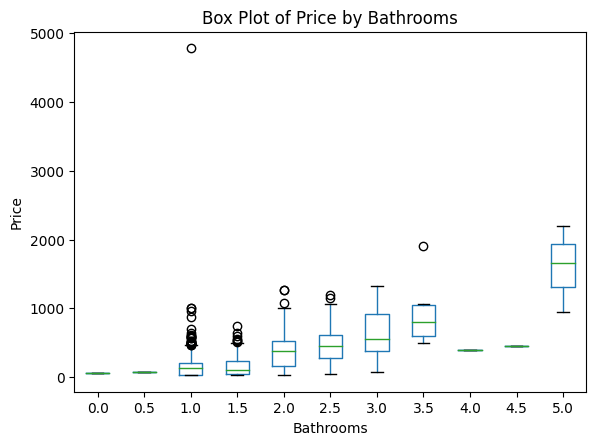

<Figure size 640x480 with 0 Axes>

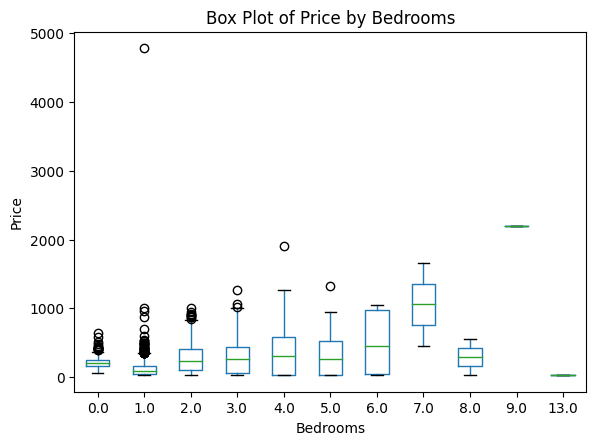

<Figure size 640x480 with 0 Axes>

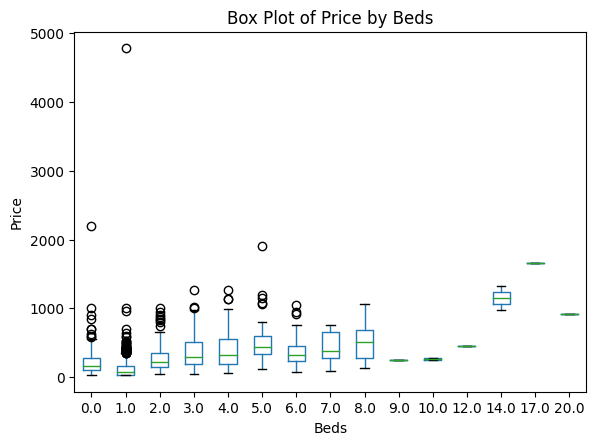

<Figure size 640x480 with 0 Axes>

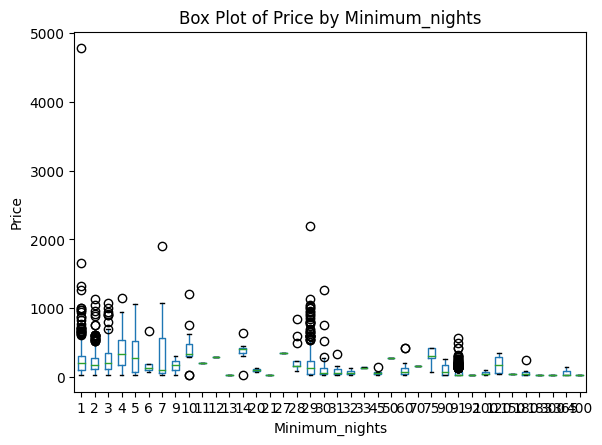

<Figure size 640x480 with 0 Axes>

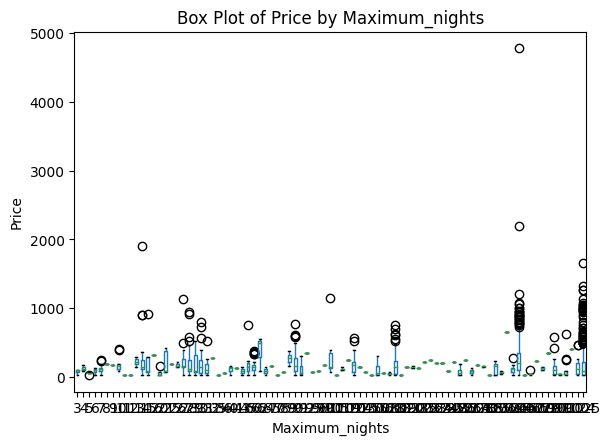

<Figure size 640x480 with 0 Axes>

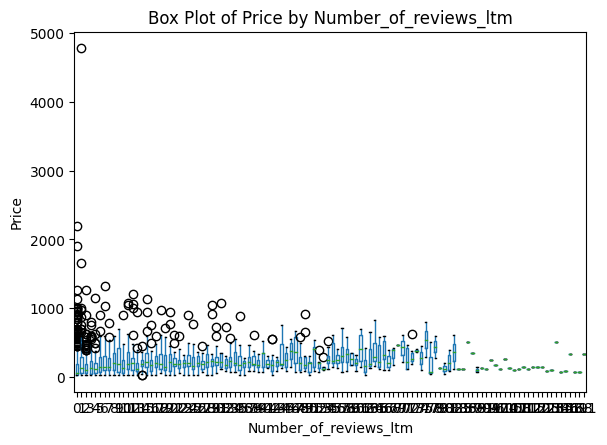

<Figure size 640x480 with 0 Axes>

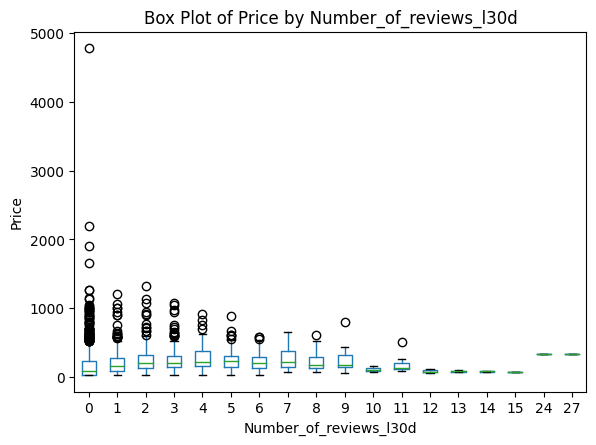

<Figure size 640x480 with 0 Axes>

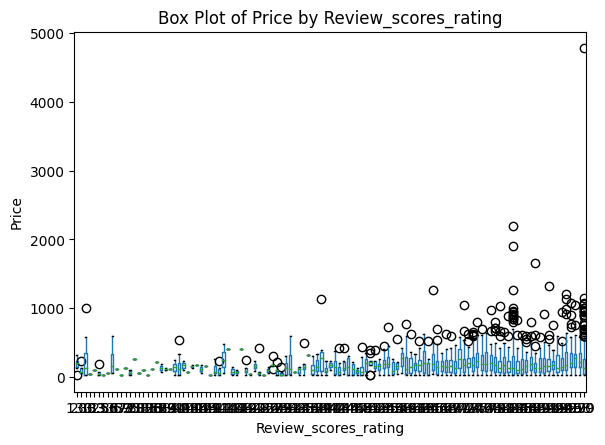

<Figure size 640x480 with 0 Axes>

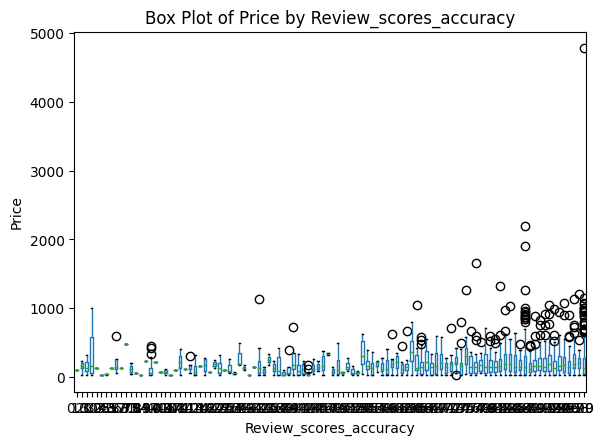

<Figure size 640x480 with 0 Axes>

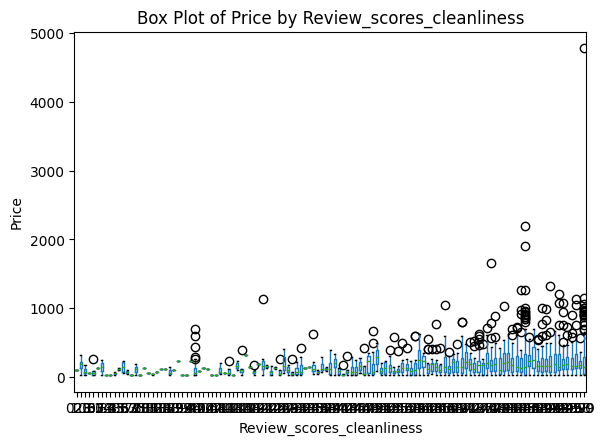

<Figure size 640x480 with 0 Axes>

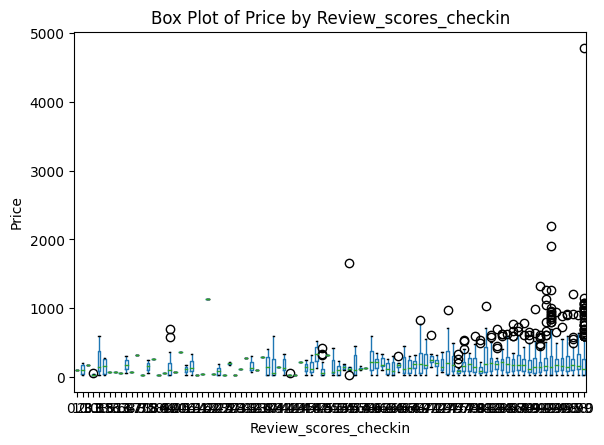

<Figure size 640x480 with 0 Axes>

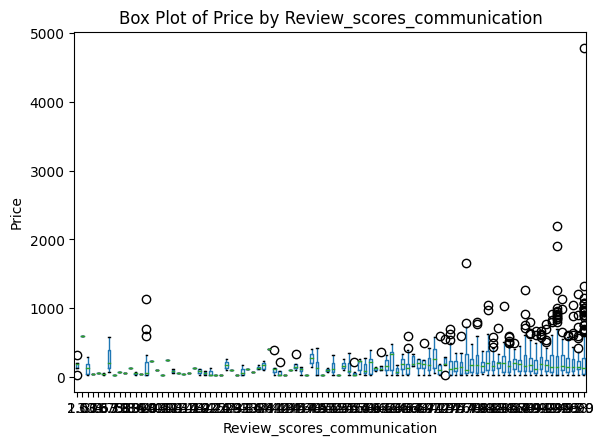

<Figure size 640x480 with 0 Axes>

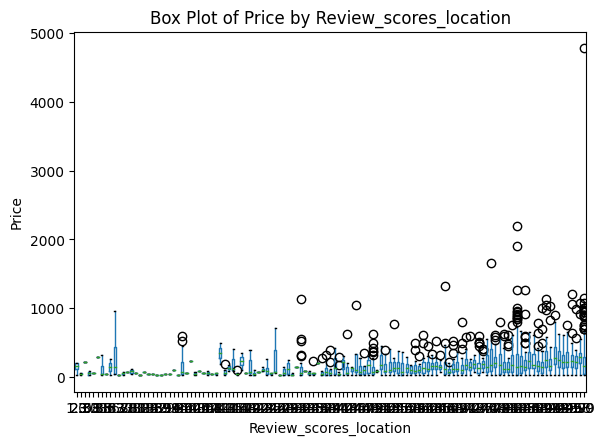

<Figure size 640x480 with 0 Axes>

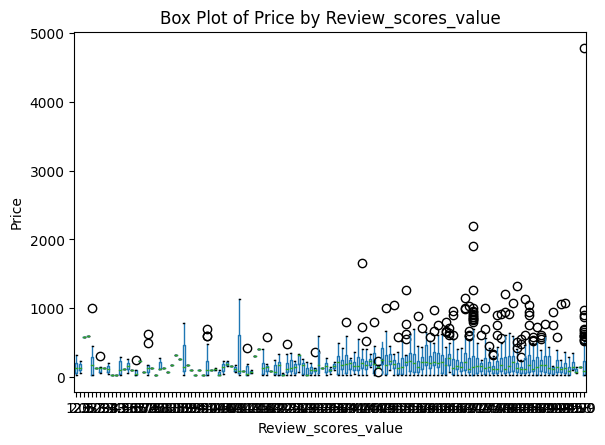

<Figure size 640x480 with 0 Axes>

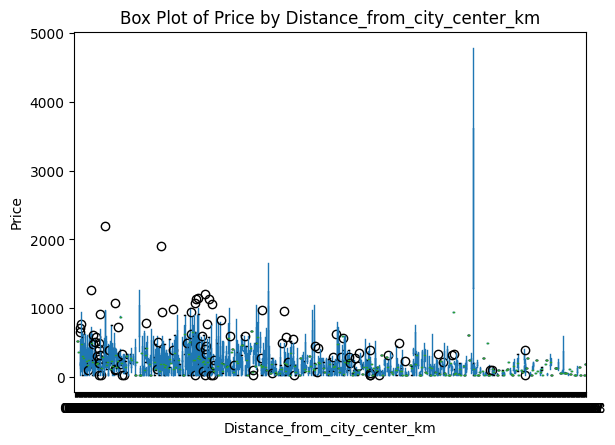

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Automatically get numerical features from the DataFrame
numerical_features = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a figure with a dynamic number of subplots for box plots
num_features = len(numerical_features)
ncols = 3  # Number of columns for the subplot grid
nrows = (num_features + ncols - 1) // ncols  # Calculate rows needed


# Create a box plot of numerical features against Price
plt.figure(figsize=(15, 8))
for feature in numerical_features:
    if feature != 'Price':
        plt.figure()
        dataframe.boxplot(column='Price', by=feature)
        plt.title(f'Box Plot of Price by {feature}')
        plt.suptitle('')  # Suppress the default title to clean up the plot
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.grid()
        plt.show()


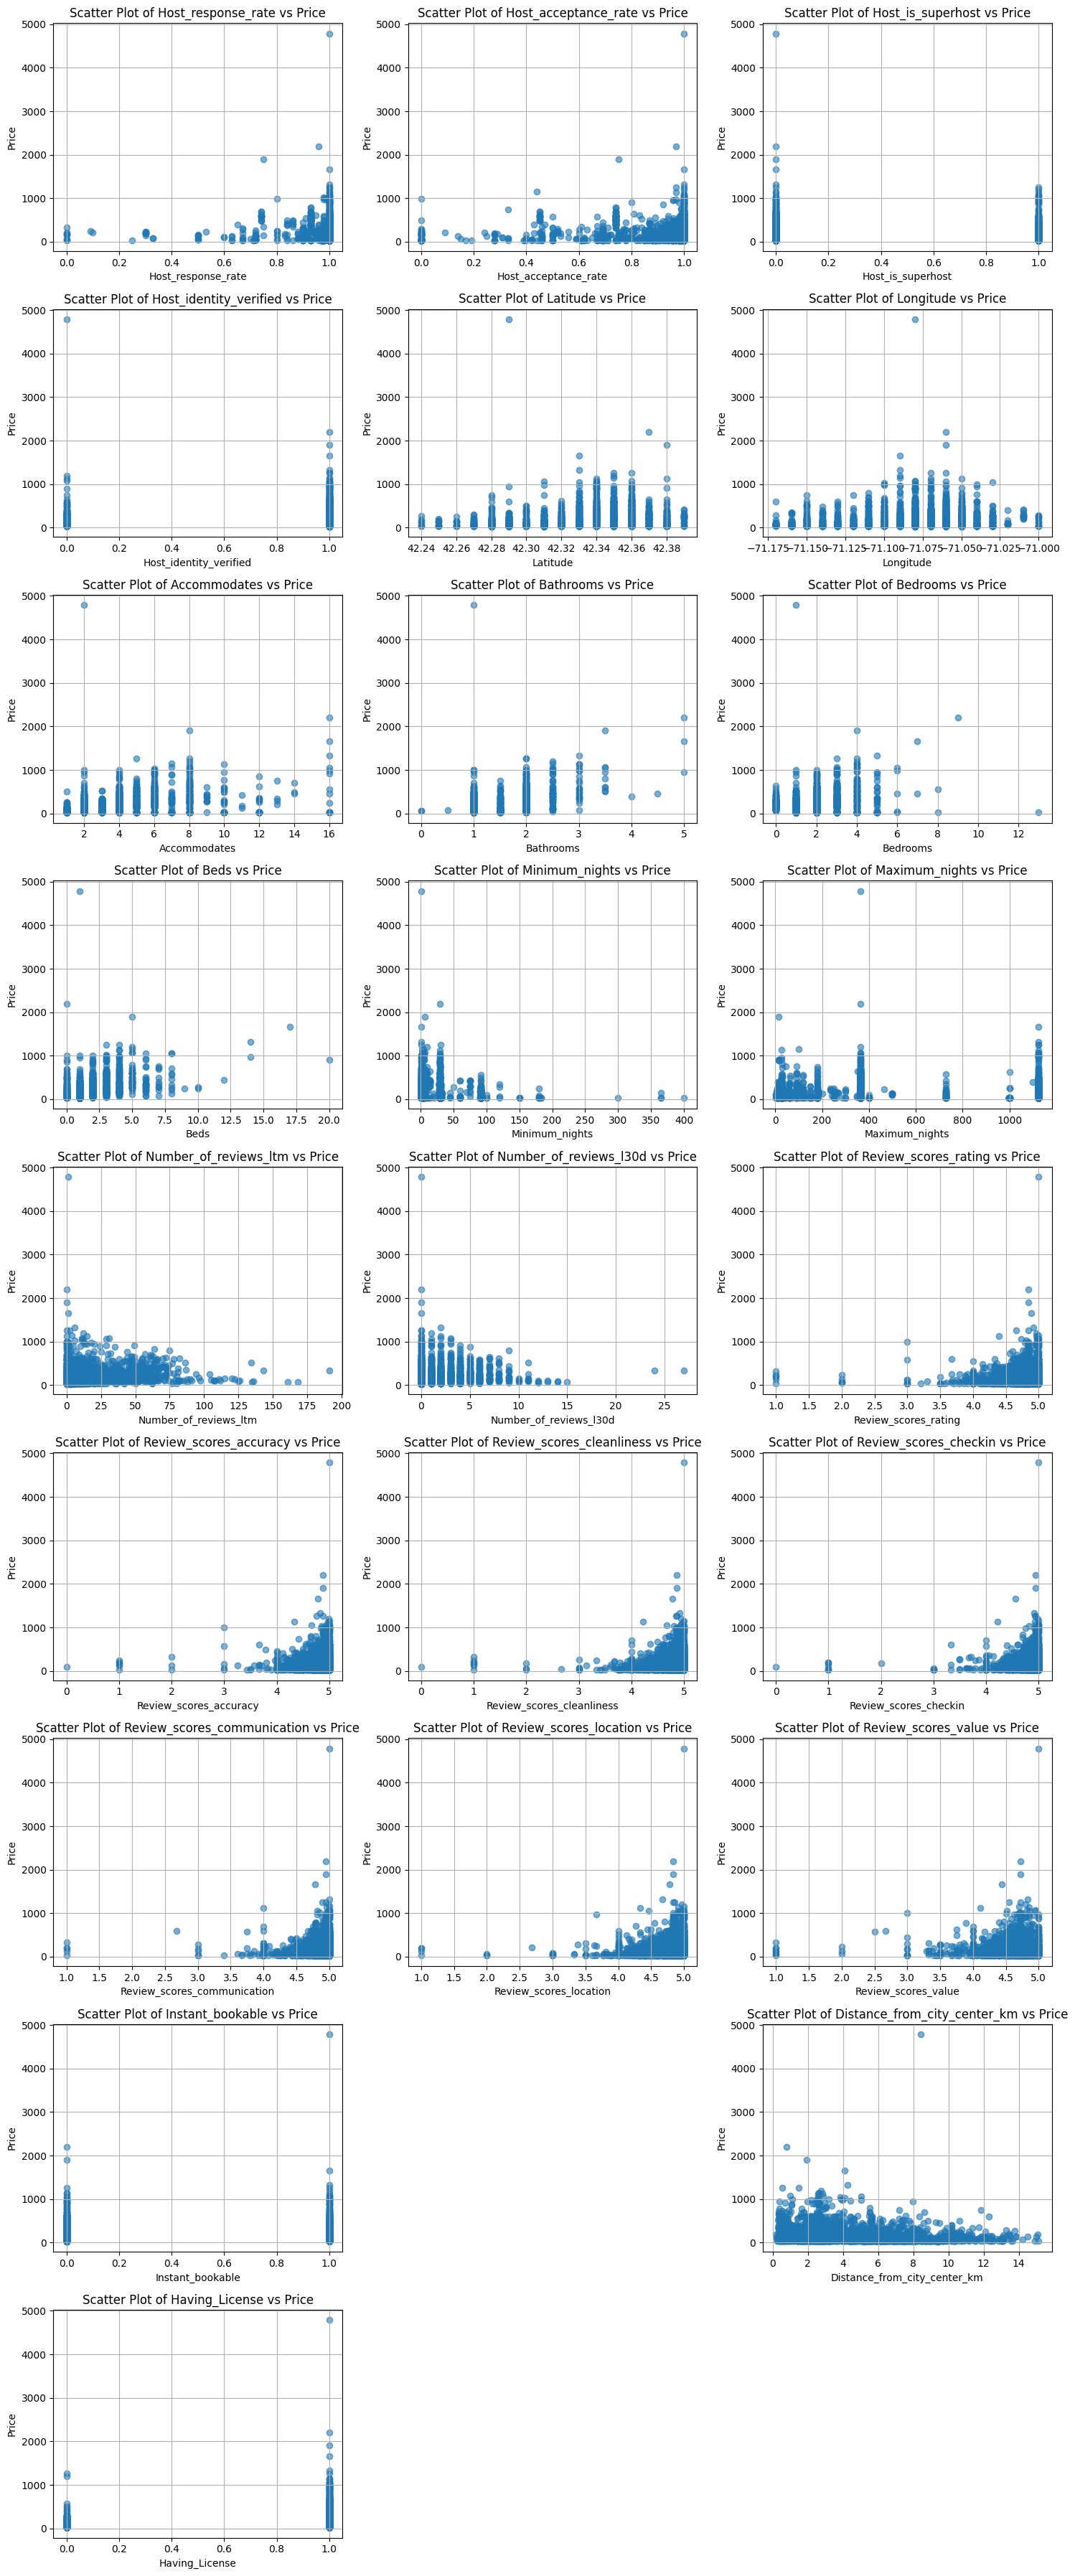

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Automatically get numerical features from the DataFrame
numerical_features = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a figure with a dynamic number of subplots
num_features = len(numerical_features)
ncols = 3  # Number of columns for the subplot grid
nrows = (num_features + ncols - 1) // ncols  # Calculate rows needed

plt.figure(figsize=(15, nrows * 4))  # Adjust height based on number of rows
for i, feature in enumerate(numerical_features):
    if feature != 'Price':  # Avoid plotting Price against itself
        plt.subplot(nrows, ncols, i + 1)  # Adjust the subplot grid dynamically
        plt.scatter(dataframe[feature], dataframe['Price'], alpha=0.6)
        plt.title(f'Scatter Plot of {feature} vs Price')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.grid()

plt.tight_layout()
plt.show()


# Just Start with the simple

In [ ]:
dataframe.head(2)

,Host_response_time,Host_response_rate,Host_acceptance_rate,Host_is_superhost,Host_neighbourhood,Host_identity_verified,Latitude,Longitude,Property_type,Room_type,...,Review_scores_communication,Review_scores_location,Review_scores_value,License,Instant_bookable,Amenities,Price,Distance_from_city_center_km,Having_License,Neighborhood_with_coords
1,Fast,1.0,0.99,True,Roxbury,True,42.33,-71.10,Entire guest suite,Entire home/apt,...,4.89,4.56,4.75,STR-490093,False,"[""Fire extinguisher"", ""Free street parking"", ""...",139.0,4.65,True,"{'name': 'Roxbury', 'latitude': 42.32844, 'lon..."
2,Fast,1.0,0.99,True,Roxbury,True,42.33,-71.09,Entire condo,Entire home/apt,...,4.95,4.52,4.72,STR-491702,False,"[""Fire extinguisher"", ""Free street parking"", ""...",179.0,4.58,True,"{'name': 'Roxbury', 'latitude': 42.32802, 'lon..."


In [ ]:
print(dataframe.dtypes)

Host_response_time               object
Host_response_rate              float64
Host_acceptance_rate            float64
Host_is_superhost                  bool
Host_neighbourhood               object
Host_identity_verified             bool
Latitude                        float64
Longitude                       float64
Property_type                    object
Room_type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Minimum_nights                    int64
Maximum_nights                    int64
Number_of_reviews_ltm             int64
Number_of_reviews_l30d            int64
Review_scores_rating            float64
Review_scores_accuracy          float64
Review_scores_cleanliness       float64
Review_scores_checkin           float64
Review_scores_communication     float64
Review_scores_location          float64
Review_scores_value             float64


In [ ]:
#dataframe = dataframe.drop(columns=['Host_response_time', 'Amenities', 'Host_neighbourhood', 'Property_type', 'Room_type', 'Neighborhood_with_coords','License'])
dataframe = dataframe.drop(columns=['Neighborhood_with_coords','License','Amenities'])

In [ ]:
for i in dataframe.columns:
  print(i)

Host_response_time
Host_response_rate
Host_acceptance_rate
Host_is_superhost
Host_neighbourhood
Host_identity_verified
Latitude
Longitude
Property_type
Room_type
Accommodates
Bathrooms
Bedrooms
Beds
Minimum_nights
Maximum_nights
Number_of_reviews_ltm
Number_of_reviews_l30d
Review_scores_rating
Review_scores_accuracy
Review_scores_cleanliness
Review_scores_checkin
Review_scores_communication
Review_scores_location
Review_scores_value
Instant_bookable
Price
Distance_from_city_center_km
Having_License


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib


# Initialize StandardScalers
input_scaler = StandardScaler()
output_scaler = StandardScaler()

X = dataframe.drop(columns=['Price'])
y = dataframe['Price'].values.reshape(-1, 1)
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

X_scaled = input_scaler.fit_transform(X[numerical_cols])
y_scaled = output_scaler.fit_transform(y)

dataframe[numerical_cols] = X_scaled
dataframe['Price'] = y_scaled

joblib.dump(input_scaler, 'input_scaler.pkl')
joblib.dump(output_scaler, 'output_scaler.pkl')

['output_scaler.pkl']

In [ ]:
bool_cols = dataframe.select_dtypes(include=['bool']).columns
dataframe[bool_cols] = dataframe[bool_cols].astype(int)

In [ ]:
dataframe['Room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}, inplace=True)
dataframe['Property_type'].replace({'Entire guest suite': 0, 'Entire condo': 1, 'Entire rental unit': 2, 'Private room in home': 3, 'Private room in rental unit': 4, 'Private room in townhouse': 5, 'Private room in condo': 6, 'Entire home': 7, 'Entire townhouse': 8, 'Entire loft': 9, 'Private room in bed and breakfast': 10, 'Shared room in home': 11, 'Entire guesthouse': 12, 'Entire serviced apartment': 13, 'Private room in guest suite': 14, 'Private room': 15, 'Private room in bungalow': 16, 'Private room in loft': 17, 'Entire place': 18, 'Private room in guesthouse': 19, 'Room in boutique hotel': 20, 'Shared room in townhouse': 21, 'Private room in serviced apartment': 22, 'Shared room in boutique hotel': 23, 'Private room in casa particular': 24, 'Boat': 25, 'Shared room in condo': 26, 'Private room in vacation home': 27, 'Shared room in vacation home': 28, 'Room in aparthotel': 29, 'Entire vacation home': 30, 'Shared room in rental unit': 31, 'Private room in villa': 32}, inplace=True)
dataframe['Host_neighbourhood'].replace({'Roxbury': 0, 'Beacon Hill': 1, 'Dorchester': 2, 'Charlestown': 3, 'Jamaica Plain': 4, 'North End': 5, 'South Boston': 6, 'Back Bay': 7, 'Roslindale': 8, 'Downtown Crossing': 9, 'South End': 10, 'Government Center': 11, 'West End': 12, np.nan: -1, 'Allston-Brighton': 13, 'Fenway/Kenmore': 14, 'Hyde Park': 15, 'West Roxbury': 16, 'East Boston': 17, 'Mattapan': 18, 'Leather District': 19, 'Mission Hill': 20, 'Chinatown': 21, 'Theater District': 22, 'Cape Neddick': 23, 'Cambridge': 24, 'Downtown': 25, 'Chestnut Hill': 26, 'Back Bay West': 27, 'Brighton': 28, 'Harwich Port': 29, 'Spring Hill': 30, 'Brookline': 31, 'East Downtown': 32, 'Lower Allston': 33, 'Prudential / St. Botolph': 34, 'D Street / West Broadway': 35, 'Bay Village': 36, 'Boston Theater District': 37, 'Eagle Hill': 38, 'Jeffries Point': 39, 'Fenway–Kenmore': 40, 'Allston': 41, 'Stony Brook / Cleary Square': 42, 'Columbus Park / Andrew Square': 43, 'Codman Square': 44, 'Central City': 45, "St. Elizabeth's": 46, 'Harvard Square': 47, 'Franklin Field South': 48, 'Brewster': 49, 'City Point': 50, 'Cedar Grove': 51, 'West Fens': 52, 'Fisher Hill': 53, 'Rockport': 54, 'East Falmouth': 55, 'Orient Heights': 56, 'Franklin Field North': 57, 'Ward Two': 58, 'Southern Mattapan': 59, 'Metropolitan Hill / Beech Street': 60, 'Harbor View / Orient Heights': 61, 'Sun Bay South': 62, 'Newton': 63, 'Wellington Hill': 64, 'Brook Farm': 65, 'South Sanford': 66, 'Dorchester Center': 67, 'Commonwealth': 68, 'Medford Street / The Neck': 69, 'West Street / River Street': 70, 'Lower Washington / Mount Hope': 71, 'South Medford': 72, 'Vineyard Haven': 73, 'Fairmount Hill': 74, 'South Beach': 75, 'Uplands': 76}, inplace=True)
dataframe['Host_response_time'].replace({'Fast': 0, 'Moderate': 1, 'Slow': 2}, inplace=True)

<ipython-input-37-c6d3d928d6f6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Host_neighbourhood'].replace({'Roxbury': 0, 'Beacon Hill': 1, 'Dorchester': 2, 'Charlestown': 3, 'Jamaica Plain': 4, 'North End': 5, 'South Boston': 6, 'Back Bay': 7, 'Roslindale': 8, 'Downtown Crossing': 9, 'South End': 10, 'Government Center': 11, 'West End': 12, np.nan: -1, 'Allston-Brighton': 13, 'Fenway/Kenmore': 14, 'Hyde Park': 15, 'West Roxbury': 16, 'East Boston': 17, 'Mattapan': 18, 'Leather District': 19, 'Mission Hill': 20, 

In [ ]:
dataframe.head(2)

,Host_response_time,Host_response_rate,Host_acceptance_rate,Host_is_superhost,Host_neighbourhood,Host_identity_verified,Latitude,Longitude,Property_type,Room_type,...,Review_scores_accuracy,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value,Instant_bookable,Price,Distance_from_city_center_km,Having_License
1,0,0.243394,0.400861,1,0,1,-0.097811,-0.551777,0,0,...,0.256374,0.383189,0.287378,0.072488,-0.573970,0.282089,0,-0.288679,0.033343,1
2,0,0.243394,0.400861,1,0,1,-0.097811,-0.243856,1,0,...,0.078259,0.302586,0.127125,0.287188,-0.693522,0.203555,0,-0.106568,0.010778,1


# Alogrithm Development

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Load your dataset (replace with your actual data)
# dataframe = pd.read_csv('your_data.csv')
# Assuming 'Price' is your target variable and all other columns are features
X = dataframe.drop(columns=['Price'])
y = dataframe['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression algorithms to evaluate
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Neighbors Regression': KNeighborsRegressor()
}

# Initialize variables to store the best model and score
best_model = None
best_r2_score = -np.inf
best_mse = np.inf

# Evaluate each regressor using cross-validation
results = {}

for name, regressor in regressors.items():
    # Create a pipeline with the regressor
    pipeline = Pipeline([
        ('regressor', regressor)
    ])

    # Perform cross-validation for R²
    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    mean_r2_score = np.mean(r2_scores)

    # Fit the pipeline to the training data and predict on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {
        'R² Score': mean_r2_score,
        'MSE': mse,
        'RMSE': rmse
    }

    print(f"{name}: Mean R² score: {mean_r2_score:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

    # Update the best model if current model is better based on R² score
    if mean_r2_score > best_r2_score:
        best_r2_score = mean_r2_score
        best_mse = mse
        best_model = pipeline

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Calculate final performance metrics on the test set
final_y_pred = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_y_pred)
final_rmse = np.sqrt(final_mse)

print(f"\nBest Model: {best_model.named_steps['regressor'].__class__.__name__}")
print(f"Best Mean R² score: {best_r2_score:.4f}")
print(f"Test MSE: {final_mse:.4f}, Test RMSE: {final_rmse:.4f}")

# Save the best model and scaler using joblib (optional)
joblib.dump(best_model, 'best_regressor_model.pkl')

# Load the best model and scaler for predictions
loaded_model = joblib.load('best_regressor_model.pkl')
loaded_scaler = joblib.load('output_scaler.pkl')

# Make predictions with the loaded model
scaled_y_pred = loaded_model.predict(X_test)

Linear Regression: Mean R² score: 0.4963, MSE: 0.4256, RMSE: 0.6524
Ridge Regression: Mean R² score: 0.4964, MSE: 0.4255, RMSE: 0.6523
Lasso Regression: Mean R² score: 0.0213, MSE: 0.9620, RMSE: 0.9808
ElasticNet Regression: Mean R² score: 0.0308, MSE: 0.9574, RMSE: 0.9785
Decision Tree: Mean R² score: -0.2396, MSE: 1.4946, RMSE: 1.2225
Random Forest: Mean R² score: 0.6008, MSE: 0.2871, RMSE: 0.5358
Gradient Boosting: Mean R² score: 0.5158, MSE: 0.3034, RMSE: 0.5508
Support Vector Regression: Mean R² score: 0.4792, MSE: 0.4656, RMSE: 0.6824
K-Neighbors Regression: Mean R² score: 0.4873, MSE: 0.4732, RMSE: 0.6879

Best Model: RandomForestRegressor
Best Mean R² score: 0.6008
Test MSE: 0.2940, Test RMSE: 0.5423


In [ ]:
original_y_pred = loaded_scaler.inverse_transform(scaled_y_pred.reshape(-1, 1))
original_y_test = loaded_scaler.inverse_transform(y_test.values.reshape(-1, 1))

print("Actual values in original scale:", original_y_test.flatten()[0:10])
print("Predicted values in original scale:", original_y_pred.flatten()[0:10])

Actual values in original scale: [207. 154.  96. 160. 357.  84. 249. 606.  56.  35.]
Predicted values in original scale: [194.21 124.33 106.76 127.8  494.11  87.11 209.39 519.67  67.39  38.6 ]


# Prediction Pipeline

In [ ]:
import pandas as pd
from flask import Flask, request, jsonify
import joblib

# Load your trained model and any preprocessors (e.g., encoders or scalers)
model = joblib.load("best_regressor_model.pkl")
input_scaler = joblib.load("input_scaler.pkl")  # If you scaled the input
output_scaler = joblib.load("output_scaler.pkl")  # If you scaled the target (output)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from request
    data = request.get_json()

    # Convert JSON to DataFrame
    dataframe = pd.DataFrame([data])

    neighborhood_coords = {'Roxbury': {'latitude': 42.32642574, 'longitude': -71.09581055}, 'Beacon Hill': {'latitude': 42.3603, 'longitude': -71.06588}, 'Dorchester': {'latitude': 42.31656979, 'longitude': -71.05215552}, 'Charlestown': {'latitude': 42.37321342, 'longitude': -71.06162061}, 'Jamaica Plain': {'latitude': 42.31672295, 'longitude': -71.11642095}, 'North End': {'latitude': 42.34399646, 'longitude': -71.06372085}, 'South Boston': {'latitude': 42.33483, 'longitude': -71.03652}, 'Back Bay': {'latitude': 42.33511, 'longitude': -71.07756}, 'Roslindale': {'latitude': 42.28117408, 'longitude': -71.1538144}, 'Downtown Crossing': {'latitude': 42.3544, 'longitude': -71.06039}, 'South End': {'latitude': 42.34583822, 'longitude': -71.06497243}, 'Government Center': {'latitude': 42.3597641, 'longitude': -71.06116486}, 'West End': {'latitude': 42.36548, 'longitude': -71.06833}, 'Allston-Brighton': {'latitude': 42.3496, 'longitude': -71.07185}, 'Fenway/Kenmore': {'latitude': 42.34742, 'longitude': -71.10491}, 'Hyde Park': {'latitude': 42.25150597, 'longitude': -71.13251906}, 'West Roxbury': {'latitude': 42.27816883, 'longitude': -71.14712801}, 'East Boston': {'latitude': 42.38606, 'longitude': -71.00721}, 'Mattapan': {'latitude': 42.27348827, 'longitude': -71.09552801}, 'Leather District': {'latitude': 42.36681, 'longitude': -71.05615}, 'Mission Hill': {'latitude': 42.32644622, 'longitude': -71.10001127}, 'Chinatown': {'latitude': 42.34873, 'longitude': -71.06069}, 'Theater District': {'latitude': 42.35112845, 'longitude': -71.06420764}, 'Cape Neddick': {'latitude': 42.3488792, 'longitude': -71.0688545}, 'Cambridge': {'latitude': 42.38356, 'longitude': -71.07874}, 'Downtown': {'latitude': 42.36239317, 'longitude': -71.05249589}, 'Chestnut Hill': {'latitude': 42.301319, 'longitude': -71.165781}, 'Back Bay West': {'latitude': 42.34988, 'longitude': -71.08989}, 'Brighton': {'latitude': 42.34949865, 'longitude': -71.17344584}, 'Harwich Port': {'latitude': 42.37327, 'longitude': -71.05859}, 'Spring Hill': {'latitude': 42.36474704, 'longitude': -71.05588948}, 'Brookline': {'latitude': 42.34832941, 'longitude': -71.07179036}, 'East Downtown': {'latitude': 42.34575, 'longitude': -71.07357}, 'Lower Allston': {'latitude': 42.36193717, 'longitude': -71.13295433}, 'Prudential / St. Botolph': {'latitude': 42.34395939, 'longitude': -71.08339092}, 'D Street / West Broadway': {'latitude': 42.34797971, 'longitude': -71.10197428}, 'Bay Village': {'latitude': 42.34982, 'longitude': -71.06879}, 'Boston Theater District': {'latitude': 42.36032, 'longitude': -71.1432}, 'Eagle Hill': {'latitude': 42.37678842, 'longitude': -71.03961242}, 'Jeffries Point': {'latitude': 42.36743, 'longitude': -71.03544}, 'Fenway–Kenmore': {'latitude': 42.34772055, 'longitude': -71.09336078}, 'Allston': {'latitude': 42.36124351, 'longitude': -71.124509}, 'Stony Brook / Cleary Square': {'latitude': 42.25809, 'longitude': -71.12244}, 'Columbus Park / Andrew Square': {'latitude': 42.3325797, 'longitude': -71.0484071}, 'Codman Square': {'latitude': 42.30824, 'longitude': -71.08452}, 'Central City': {'latitude': 42.31493672, 'longitude': -71.05546264}, "St. Elizabeth's": {'latitude': 42.33999007, 'longitude': -71.1553969}, 'Harvard Square': {'latitude': 42.36033286, 'longitude': -71.0709537}, 'Franklin Field South': {'latitude': 42.28967849, 'longitude': -71.0800464}, 'Brewster': {'latitude': 42.339042, 'longitude': -71.0803574}, 'City Point': {'latitude': 42.33581, 'longitude': -71.03809}, 'Cedar Grove': {'latitude': 42.28487357, 'longitude': -71.04756586}, 'West Fens': {'latitude': 42.34097, 'longitude': -71.09694}, 'Fisher Hill': {'latitude': 42.33855, 'longitude': -71.14882}, 'Rockport': {'latitude': 42.37449, 'longitude': -71.06198}, 'East Falmouth': {'latitude': 42.28288, 'longitude': -71.139}, 'Orient Heights': {'latitude': 42.38831, 'longitude': -70.996}, 'Franklin Field North': {'latitude': 42.2959361, 'longitude': -71.0808318}, 'Ward Two': {'latitude': 42.36845, 'longitude': -71.03757}, 'Southern Mattapan': {'latitude': 42.26976, 'longitude': -71.08894}, 'Metropolitan Hill / Beech Street': {'latitude': 42.28509, 'longitude': -71.14088}, 'Harbor View / Orient Heights': {'latitude': 42.37688, 'longitude': -71.02791}, 'Sun Bay South': {'latitude': 42.34670877, 'longitude': -71.15158383}, 'Newton': {'latitude': 42.35040321, 'longitude': -71.06369056}, 'Wellington Hill': {'latitude': 42.28326, 'longitude': -71.09263}, 'Brook Farm': {'latitude': 42.29362, 'longitude': -71.13868}, 'South Sanford': {'latitude': 42.3359355, 'longitude': -71.04609542}, 'Dorchester Center': {'latitude': 42.27987, 'longitude': -71.05947}, 'Commonwealth': {'latitude': 42.3385253, 'longitude': -71.1508895}, 'Medford Street / The Neck': {'latitude': 42.38045, 'longitude': -71.07001}, 'West Street / River Street': {'latitude': 42.27131552, 'longitude': -71.12159059}, 'Lower Washington / Mount Hope': {'latitude': 42.2821, 'longitude': -71.12259}, 'South Medford': {'latitude': 42.28938, 'longitude': -71.04194}, 'Vineyard Haven': {'latitude': 42.35846, 'longitude': -71.07213}, 'Fairmount Hill': {'latitude': 42.24472839, 'longitude': -71.12051106}, 'South Beach': {'latitude': 42.36539578, 'longitude': -71.05525976}, 'Uplands': {'latitude': 42.32563, 'longitude': -71.07994}}
    dataframe['Latitude'] = dataframe['Host_neighbourhood'].map(lambda x: neighborhood_coords.get(x, {}).get('latitude'))
    dataframe['Longitude'] = dataframe['Host_neighbourhood'].map(lambda x: neighborhood_coords.get(x, {}).get('longitude'))

    city_center_coords = (42.3601, -71.0589)  # These are Bosten City Center Coordinates.
    dataframe['Distance_from_city_center_km'] = dataframe.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), city_center_coords).km, axis=1)
    dataframe =dataframe[['Host_response_time', 'Host_response_rate', 'Host_acceptance_rate', 'Host_is_superhost', 'Host_neighbourhood', 'Host_identity_verified', 'Latitude', 'Longitude', 'Property_type', 'Room_type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Minimum_nights', 'Maximum_nights', 'Number_of_reviews_ltm', 'Number_of_reviews_l30d', 'Review_scores_rating', 'Review_scores_accuracy', 'Review_scores_cleanliness', 'Review_scores_checkin', 'Review_scores_communication', 'Review_scores_location', 'Review_scores_value', 'Instant_bookable', 'Distance_from_city_center_km', 'Having_License']]
    numerical_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    X_scaled = input_scaler.transform(dataframe[numerical_cols])
    dataframe[numerical_cols] = X_scaled
    bool_cols = dataframe.select_dtypes(include=['bool']).columns
    dataframe[bool_cols] = dataframe[bool_cols].astype(int)
    dataframe['Room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}, inplace=True)
    dataframe['Property_type'].replace({'Entire guest suite': 0, 'Entire condo': 1, 'Entire rental unit': 2, 'Private room in home': 3, 'Private room in rental unit': 4, 'Private room in townhouse': 5, 'Private room in condo': 6, 'Entire home': 7, 'Entire townhouse': 8, 'Entire loft': 9, 'Private room in bed and breakfast': 10, 'Shared room in home': 11, 'Entire guesthouse': 12, 'Entire serviced apartment': 13, 'Private room in guest suite': 14, 'Private room': 15, 'Private room in bungalow': 16, 'Private room in loft': 17, 'Entire place': 18, 'Private room in guesthouse': 19, 'Room in boutique hotel': 20, 'Shared room in townhouse': 21, 'Private room in serviced apartment': 22, 'Shared room in boutique hotel': 23, 'Private room in casa particular': 24, 'Boat': 25, 'Shared room in condo': 26, 'Private room in vacation home': 27, 'Shared room in vacation home': 28, 'Room in aparthotel': 29, 'Entire vacation home': 30, 'Shared room in rental unit': 31, 'Private room in villa': 32}, inplace=True)
    dataframe['Host_neighbourhood'].replace({'Roxbury': 0, 'Beacon Hill': 1, 'Dorchester': 2, 'Charlestown': 3, 'Jamaica Plain': 4, 'North End': 5, 'South Boston': 6, 'Back Bay': 7, 'Roslindale': 8, 'Downtown Crossing': 9, 'South End': 10, 'Government Center': 11, 'West End': 12, np.nan: -1, 'Allston-Brighton': 13, 'Fenway/Kenmore': 14, 'Hyde Park': 15, 'West Roxbury': 16, 'East Boston': 17, 'Mattapan': 18, 'Leather District': 19, 'Mission Hill': 20, 'Chinatown': 21, 'Theater District': 22, 'Cape Neddick': 23, 'Cambridge': 24, 'Downtown': 25, 'Chestnut Hill': 26, 'Back Bay West': 27, 'Brighton': 28, 'Harwich Port': 29, 'Spring Hill': 30, 'Brookline': 31, 'East Downtown': 32, 'Lower Allston': 33, 'Prudential / St. Botolph': 34, 'D Street / West Broadway': 35, 'Bay Village': 36, 'Boston Theater District': 37, 'Eagle Hill': 38, 'Jeffries Point': 39, 'Fenway–Kenmore': 40, 'Allston': 41, 'Stony Brook / Cleary Square': 42, 'Columbus Park / Andrew Square': 43, 'Codman Square': 44, 'Central City': 45, "St. Elizabeth's": 46, 'Harvard Square': 47, 'Franklin Field South': 48, 'Brewster': 49, 'City Point': 50, 'Cedar Grove': 51, 'West Fens': 52, 'Fisher Hill': 53, 'Rockport': 54, 'East Falmouth': 55, 'Orient Heights': 56, 'Franklin Field North': 57, 'Ward Two': 58, 'Southern Mattapan': 59, 'Metropolitan Hill / Beech Street': 60, 'Harbor View / Orient Heights': 61, 'Sun Bay South': 62, 'Newton': 63, 'Wellington Hill': 64, 'Brook Farm': 65, 'South Sanford': 66, 'Dorchester Center': 67, 'Commonwealth': 68, 'Medford Street / The Neck': 69, 'West Street / River Street': 70, 'Lower Washington / Mount Hope': 71, 'South Medford': 72, 'Vineyard Haven': 73, 'Fairmount Hill': 74, 'South Beach': 75, 'Uplands': 76}, inplace=True)
    dataframe['Host_response_time'].replace({'Fast': 0, 'Moderate': 1, 'Slow': 2}, inplace=True)

    dataframe = dataframe.round({col: 2 for col in dataframe.select_dtypes(include='float').columns})
    # Make predictions
    scaled_prediction = model.predict(dataframe)

    # If target (output) was scaled, inverse the transformation to get the original scale
    prediction = output_scaler.inverse_transform(scaled_prediction.reshape(-1, 1))
    predicted_price = round(prediction[0][0], 2)

    # Send the prediction back as JSON
    return jsonify({"message": f"The best guess price based on your input is {predicted_price:.2f}."})


if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
['Entire guest suite' 'Entire condo' 'Entire rental unit'
 'Private room in home' 'Private room in rental unit'
 'Private room in townhouse' 'Private room in condo' 'Entire home'
 'Entire townhouse' 'Entire loft' 'Private room in bed and breakfast'
 'Shared room in home' 'Entire guesthouse' 'Entire serviced apartment'
 'Private room in guest suite' 'Private room' 'Private room in bungalow'
 'Private room in loft' 'Entire place' 'Private room in guesthouse'
 'Room in boutique hotel' 'Shared room in townhouse'
 'Private room in serviced apartment' 'Shared room in boutique hotel'
 'Private room in casa particular' 'Boat' 'Shared room in condo'
 'Private room in vacation home' 'Shared room in vacation home'
 'Room in aparthotel' 'Entire vacation home' 'Shared room in rental unit'
 'Private room in villa']
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']

In [ ]:
import pandas as pd
import joblib
import pickle

# JSON object
json_data = {
    "Host_response_time": "Fast",
    "Host_response_rate": 0.72,
    "Host_acceptance_rate": 0.5,
    "Host_is_superhost": True,
    "Host_neighbourhood": "Roxbury",
    "Host_identity_verified": True,
    "Property_type": "Entire rental unit",
    "Room_type": "Entire home/apt",
    "Accommodates": 3,
    "Bathrooms": 4,
    "Bedrooms": 4,
    "Beds": 3,
    "Minimum_nights": 1,
    "Maximum_nights": 3,
    "Number_of_reviews_ltm": 23,
    "Number_of_reviews_l30d": 4,
    "Review_scores_rating": 3.94,
    "Review_scores_accuracy": 3.33,
    "Review_scores_cleanliness": 2.5,
    "Review_scores_checkin": 2.5,
    "Review_scores_communication": 2.5,
    "Review_scores_location": 3.87,
    "Review_scores_value": 3.94,
    "Instant_bookable": True,
    "Having_License": True
}
model = joblib.load("best_regressor_model.pkl")
input_scaler = joblib.load("input_scaler.pkl")  # If you scaled the input
output_scaler = joblib.load("output_scaler.pkl")  # If you scaled the target (output)

# Convert JSON to DataFrame
dataframe = pd.DataFrame([json_data])

neighborhood_coords = {'Roxbury': {'latitude': 42.32642574, 'longitude': -71.09581055}, 'Beacon Hill': {'latitude': 42.3603, 'longitude': -71.06588}, 'Dorchester': {'latitude': 42.31656979, 'longitude': -71.05215552}, 'Charlestown': {'latitude': 42.37321342, 'longitude': -71.06162061}, 'Jamaica Plain': {'latitude': 42.31672295, 'longitude': -71.11642095}, 'North End': {'latitude': 42.34399646, 'longitude': -71.06372085}, 'South Boston': {'latitude': 42.33483, 'longitude': -71.03652}, 'Back Bay': {'latitude': 42.33511, 'longitude': -71.07756}, 'Roslindale': {'latitude': 42.28117408, 'longitude': -71.1538144}, 'Downtown Crossing': {'latitude': 42.3544, 'longitude': -71.06039}, 'South End': {'latitude': 42.34583822, 'longitude': -71.06497243}, 'Government Center': {'latitude': 42.3597641, 'longitude': -71.06116486}, 'West End': {'latitude': 42.36548, 'longitude': -71.06833}, 'Allston-Brighton': {'latitude': 42.3496, 'longitude': -71.07185}, 'Fenway/Kenmore': {'latitude': 42.34742, 'longitude': -71.10491}, 'Hyde Park': {'latitude': 42.25150597, 'longitude': -71.13251906}, 'West Roxbury': {'latitude': 42.27816883, 'longitude': -71.14712801}, 'East Boston': {'latitude': 42.38606, 'longitude': -71.00721}, 'Mattapan': {'latitude': 42.27348827, 'longitude': -71.09552801}, 'Leather District': {'latitude': 42.36681, 'longitude': -71.05615}, 'Mission Hill': {'latitude': 42.32644622, 'longitude': -71.10001127}, 'Chinatown': {'latitude': 42.34873, 'longitude': -71.06069}, 'Theater District': {'latitude': 42.35112845, 'longitude': -71.06420764}, 'Cape Neddick': {'latitude': 42.3488792, 'longitude': -71.0688545}, 'Cambridge': {'latitude': 42.38356, 'longitude': -71.07874}, 'Downtown': {'latitude': 42.36239317, 'longitude': -71.05249589}, 'Chestnut Hill': {'latitude': 42.301319, 'longitude': -71.165781}, 'Back Bay West': {'latitude': 42.34988, 'longitude': -71.08989}, 'Brighton': {'latitude': 42.34949865, 'longitude': -71.17344584}, 'Harwich Port': {'latitude': 42.37327, 'longitude': -71.05859}, 'Spring Hill': {'latitude': 42.36474704, 'longitude': -71.05588948}, 'Brookline': {'latitude': 42.34832941, 'longitude': -71.07179036}, 'East Downtown': {'latitude': 42.34575, 'longitude': -71.07357}, 'Lower Allston': {'latitude': 42.36193717, 'longitude': -71.13295433}, 'Prudential / St. Botolph': {'latitude': 42.34395939, 'longitude': -71.08339092}, 'D Street / West Broadway': {'latitude': 42.34797971, 'longitude': -71.10197428}, 'Bay Village': {'latitude': 42.34982, 'longitude': -71.06879}, 'Boston Theater District': {'latitude': 42.36032, 'longitude': -71.1432}, 'Eagle Hill': {'latitude': 42.37678842, 'longitude': -71.03961242}, 'Jeffries Point': {'latitude': 42.36743, 'longitude': -71.03544}, 'Fenway–Kenmore': {'latitude': 42.34772055, 'longitude': -71.09336078}, 'Allston': {'latitude': 42.36124351, 'longitude': -71.124509}, 'Stony Brook / Cleary Square': {'latitude': 42.25809, 'longitude': -71.12244}, 'Columbus Park / Andrew Square': {'latitude': 42.3325797, 'longitude': -71.0484071}, 'Codman Square': {'latitude': 42.30824, 'longitude': -71.08452}, 'Central City': {'latitude': 42.31493672, 'longitude': -71.05546264}, "St. Elizabeth's": {'latitude': 42.33999007, 'longitude': -71.1553969}, 'Harvard Square': {'latitude': 42.36033286, 'longitude': -71.0709537}, 'Franklin Field South': {'latitude': 42.28967849, 'longitude': -71.0800464}, 'Brewster': {'latitude': 42.339042, 'longitude': -71.0803574}, 'City Point': {'latitude': 42.33581, 'longitude': -71.03809}, 'Cedar Grove': {'latitude': 42.28487357, 'longitude': -71.04756586}, 'West Fens': {'latitude': 42.34097, 'longitude': -71.09694}, 'Fisher Hill': {'latitude': 42.33855, 'longitude': -71.14882}, 'Rockport': {'latitude': 42.37449, 'longitude': -71.06198}, 'East Falmouth': {'latitude': 42.28288, 'longitude': -71.139}, 'Orient Heights': {'latitude': 42.38831, 'longitude': -70.996}, 'Franklin Field North': {'latitude': 42.2959361, 'longitude': -71.0808318}, 'Ward Two': {'latitude': 42.36845, 'longitude': -71.03757}, 'Southern Mattapan': {'latitude': 42.26976, 'longitude': -71.08894}, 'Metropolitan Hill / Beech Street': {'latitude': 42.28509, 'longitude': -71.14088}, 'Harbor View / Orient Heights': {'latitude': 42.37688, 'longitude': -71.02791}, 'Sun Bay South': {'latitude': 42.34670877, 'longitude': -71.15158383}, 'Newton': {'latitude': 42.35040321, 'longitude': -71.06369056}, 'Wellington Hill': {'latitude': 42.28326, 'longitude': -71.09263}, 'Brook Farm': {'latitude': 42.29362, 'longitude': -71.13868}, 'South Sanford': {'latitude': 42.3359355, 'longitude': -71.04609542}, 'Dorchester Center': {'latitude': 42.27987, 'longitude': -71.05947}, 'Commonwealth': {'latitude': 42.3385253, 'longitude': -71.1508895}, 'Medford Street / The Neck': {'latitude': 42.38045, 'longitude': -71.07001}, 'West Street / River Street': {'latitude': 42.27131552, 'longitude': -71.12159059}, 'Lower Washington / Mount Hope': {'latitude': 42.2821, 'longitude': -71.12259}, 'South Medford': {'latitude': 42.28938, 'longitude': -71.04194}, 'Vineyard Haven': {'latitude': 42.35846, 'longitude': -71.07213}, 'Fairmount Hill': {'latitude': 42.24472839, 'longitude': -71.12051106}, 'South Beach': {'latitude': 42.36539578, 'longitude': -71.05525976}, 'Uplands': {'latitude': 42.32563, 'longitude': -71.07994}}
dataframe['Latitude'] = dataframe['Host_neighbourhood'].map(lambda x: neighborhood_coords.get(x, {}).get('latitude'))
dataframe['Longitude'] = dataframe['Host_neighbourhood'].map(lambda x: neighborhood_coords.get(x, {}).get('longitude'))
city_center_coords = (42.3601, -71.0589)  # These are Bosten City Center Coordinates.
dataframe['Distance_from_city_center_km'] = dataframe.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), city_center_coords).km, axis=1)
dataframe =dataframe[['Host_response_time', 'Host_response_rate', 'Host_acceptance_rate', 'Host_is_superhost', 'Host_neighbourhood', 'Host_identity_verified', 'Latitude', 'Longitude', 'Property_type', 'Room_type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Minimum_nights', 'Maximum_nights', 'Number_of_reviews_ltm', 'Number_of_reviews_l30d', 'Review_scores_rating', 'Review_scores_accuracy', 'Review_scores_cleanliness', 'Review_scores_checkin', 'Review_scores_communication', 'Review_scores_location', 'Review_scores_value', 'Instant_bookable', 'Distance_from_city_center_km', 'Having_License']]
numerical_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
X_scaled = input_scaler.transform(dataframe[numerical_cols])
dataframe[numerical_cols] = X_scaled
bool_cols = dataframe.select_dtypes(include=['bool']).columns
dataframe[bool_cols] = dataframe[bool_cols].astype(int)
dataframe['Room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}, inplace=True)
dataframe['Property_type'].replace({'Entire guest suite': 0, 'Entire condo': 1, 'Entire rental unit': 2, 'Private room in home': 3, 'Private room in rental unit': 4, 'Private room in townhouse': 5, 'Private room in condo': 6, 'Entire home': 7, 'Entire townhouse': 8, 'Entire loft': 9, 'Private room in bed and breakfast': 10, 'Shared room in home': 11, 'Entire guesthouse': 12, 'Entire serviced apartment': 13, 'Private room in guest suite': 14, 'Private room': 15, 'Private room in bungalow': 16, 'Private room in loft': 17, 'Entire place': 18, 'Private room in guesthouse': 19, 'Room in boutique hotel': 20, 'Shared room in townhouse': 21, 'Private room in serviced apartment': 22, 'Shared room in boutique hotel': 23, 'Private room in casa particular': 24, 'Boat': 25, 'Shared room in condo': 26, 'Private room in vacation home': 27, 'Shared room in vacation home': 28, 'Room in aparthotel': 29, 'Entire vacation home': 30, 'Shared room in rental unit': 31, 'Private room in villa': 32}, inplace=True)
dataframe['Host_neighbourhood'].replace({'Roxbury': 0, 'Beacon Hill': 1, 'Dorchester': 2, 'Charlestown': 3, 'Jamaica Plain': 4, 'North End': 5, 'South Boston': 6, 'Back Bay': 7, 'Roslindale': 8, 'Downtown Crossing': 9, 'South End': 10, 'Government Center': 11, 'West End': 12, np.nan: -1, 'Allston-Brighton': 13, 'Fenway/Kenmore': 14, 'Hyde Park': 15, 'West Roxbury': 16, 'East Boston': 17, 'Mattapan': 18, 'Leather District': 19, 'Mission Hill': 20, 'Chinatown': 21, 'Theater District': 22, 'Cape Neddick': 23, 'Cambridge': 24, 'Downtown': 25, 'Chestnut Hill': 26, 'Back Bay West': 27, 'Brighton': 28, 'Harwich Port': 29, 'Spring Hill': 30, 'Brookline': 31, 'East Downtown': 32, 'Lower Allston': 33, 'Prudential / St. Botolph': 34, 'D Street / West Broadway': 35, 'Bay Village': 36, 'Boston Theater District': 37, 'Eagle Hill': 38, 'Jeffries Point': 39, 'Fenway–Kenmore': 40, 'Allston': 41, 'Stony Brook / Cleary Square': 42, 'Columbus Park / Andrew Square': 43, 'Codman Square': 44, 'Central City': 45, "St. Elizabeth's": 46, 'Harvard Square': 47, 'Franklin Field South': 48, 'Brewster': 49, 'City Point': 50, 'Cedar Grove': 51, 'West Fens': 52, 'Fisher Hill': 53, 'Rockport': 54, 'East Falmouth': 55, 'Orient Heights': 56, 'Franklin Field North': 57, 'Ward Two': 58, 'Southern Mattapan': 59, 'Metropolitan Hill / Beech Street': 60, 'Harbor View / Orient Heights': 61, 'Sun Bay South': 62, 'Newton': 63, 'Wellington Hill': 64, 'Brook Farm': 65, 'South Sanford': 66, 'Dorchester Center': 67, 'Commonwealth': 68, 'Medford Street / The Neck': 69, 'West Street / River Street': 70, 'Lower Washington / Mount Hope': 71, 'South Medford': 72, 'Vineyard Haven': 73, 'Fairmount Hill': 74, 'South Beach': 75, 'Uplands': 76}, inplace=True)
dataframe['Host_response_time'].replace({'Fast': 0, 'Moderate': 1, 'Slow': 2}, inplace=True)

dataframe = dataframe.round({col: 2 for col in dataframe.select_dtypes(include='float').columns})
scaled_prediction = model.predict(dataframe)

# If target (output) was scaled, inverse the transformation to get the original scale
prediction = output_scaler.inverse_transform(scaled_prediction.reshape(-1, 1))

# Send the prediction back as JSON
print({"predicted_price": prediction[0][0]})




{'predicted_price': 536.1799999999997}


<ipython-input-59-73ff85e586c1>:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}, inplace=True)
<ipython-input-59-73ff85e586c1>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['Ro

In [ ]:
dataframe.head(2)

,Host_response_time,Host_response_rate,Host_acceptance_rate,Host_is_superhost,Host_neighbourhood,Host_identity_verified,Latitude,Longitude,Property_type,Room_type,...,Review_scores_rating,Review_scores_accuracy,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value,Instant_bookable,Distance_from_city_center_km,Having_License
0,0,-2.59,-1.99,1,2,1,-0.56,0.92,30,2,...,-2.34,-4.34,-6.07,-7.57,-8.48,-2.64,-1.84,1,0.1,1
